## Visualization of simulation data and comparison
### visualization with PyVista for presentations


In [1]:
### load module
%matplotlib notebook
#import instaseis
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('science') # Lovely plotting style

import h5py
import pandas as pd
import seissolxdmf 
# from pythonXdmfReader.pythonXdmfReader import *

import pyproj
import scipy.io as sio
import matplotlib.tri as tri
# from mpl_toolkits.basemap import Basemap
from scipy import spatial
from netCDF4 import Dataset

import seaborn as sns

# c_blue=['#2878B5','#9AC9DB'];
# c_red=['#C82423','#F8AC8C','#FF8884'];
# c_gre=['#96C37D','#8ECFC9'];
# c_pur=['#8B8EFE','#C497B2'];

colors2=sns.color_palette("rocket",8);
print('load modulus')

load modulus


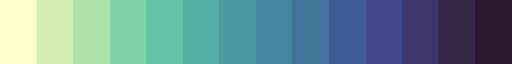

In [2]:
import palettable.matplotlib as cmapa
from palettable.cmocean import sequential as cmapb

from matplotlib.colors import ListedColormap

Cmap = ListedColormap(cmapa.Inferno_14.mpl_colors)
Cmap
Cmap2 = ListedColormap(cmapb.Deep_14.mpl_colors)
Cmap2


In [7]:
# define plotting style setup

# font = {'family' : 'normal',
#         'weight' : 'regular',
#         'size'   : 12}
import matplotlib

print(matplotlib.style.available)

from matplotlib.ticker import MultipleLocator

# matplotlib.rc('font', **font)
matplotlib.style.use('seaborn-paper') # Lovely plotting style
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['legend.fontsize'] = 18
# matplotlib.rcParams['xtick.direction'] = 'in'
# matplotlib.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.major.size'] = 5.0
# plt.rcParams['xtick.minor.size'] = 3.0
# plt.rcParams['ytick.major.size'] = 5.0
# plt.rcParams['ytick.minor.size'] = 3.0

# plt.rcParams['axes.linewidth'] = 1.2
# plt.rcParams['legend.handlelength'] = 3.0import matplotlib


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
# load surface static GPS displacement and compare



In [18]:
# load USGS  fault slip model
# modelname = 'tp17n222'
# modelname = 'tp20n410'
modelname = 'rup18b'
modelname = 'rup21h'
# modelname = 'alkR057-TP72f'

import seissolxdmf
import pyproj
import matplotlib.tri as tri


# coastfile ='./Geometry/CoastNorth.txt.npy'
# coast =  np.load(coastfile)
# print(coast)

def load_surf_gm(xdmfFilename):
                 
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
    ndt = sx.ReadNdt()
    surfxyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    
    print(surfxyz.shape,connect.shape)
    
    # convert  # UTM projection
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
    
    surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
    
    # print(surf.shape)
    ############# load GMPEs data  ##############
    triang = tri.Triangulation(surf[0],surf[1],connect) # in longitude and latititude
    # triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in Cartesian xyz coords.
    
    ##%%
    v1 = sx.ReadData('v1')
    v2 = sx.ReadData('v2')
    v3 = sx.ReadData('v3')

    # sa0_2 = sx.ReadData('SA05.0000s')
    
    return v1,v2,v3,triang

In [19]:
## plot 
# foldername = 'result1938/'
rootfolder = '/scale_wlg_nobackup/filesets/nobackup/gns04005/daisy/'
foldername = rootfolder + 'WelBasin/model2/output/'
modelname = 'm4-4hz'
xdmfFilename  = foldername + modelname + '-surface.xdmf'

## load data and plot 

v1,v2,v3,triang = load_surf_gm(xdmfFilename)
print(v1.shape)

(197184, 3) (65728, 3)
(122, 65728)


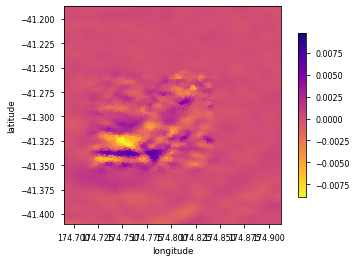

In [24]:
# plot initial parameters

# print(surf[0],surf[1])
%matplotlib inline


min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903
ext = 0.01


fig,ax2 = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

sc = ax2.tripcolor(triang,v1[50,:],cmap='plasma_r',shading='flat')
cl = fig.colorbar(sc,ax=ax2,shrink=0.75)
# cl.set_label('SA (cm/s**2)')
# ax2[0].plot(coast[0],coast[1],'-k',markersize=0.1)
# ax2[0].plot(siteTable.lon,siteTable.lat,'^w',markersize=5.)

ax2.set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax2.set_aspect(1)
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

# sc = ax2[1].tripcolor(triang,pgv*100,cmap='plasma_r',shading='flat',vmin= 0.0,vmax=100)
# cl = fig.colorbar(sc,ax=ax2[1],shrink=0.75)
# cl.set_label('PGV (cm/s)')
# ax2[1].plot(coast[0],coast[1],'-k',markersize=0.1)
# ax2[1].set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))

# ax2[1].set_aspect(1)
# ax2[1].set_xlabel('longitude')
# ax2[1].set_ylabel('latitude')

outname = modelname + '-v1.png'
plt.savefig(outname, dpi=300, transparent=False)
plt.show()
plt.close()


In [26]:
#%%

In [17]:
import pyvista as pv
import meshio

In [ ]:
# points data: hypocenters of the two earthquakes

hypos = np.array([[1433876.981729,-1927697.024263,-30782.235925],
                       [1603439.276990, -1914489.967751,-15679.983462]])
print(hypos)
PointCloud = pv.PolyData(hypos)

# load xdmf data of Seissol output

xdmfFilename = foldername  +  '/'+  modelname +'-fault.xdmf'
TrialFault_xyz = ReadGeometry(xdmfFilename)
TrialFault_connect = ReadConnect(xdmfFilename)

# Create mesh file

FaultMeshPath = "./FltMesh_" + modelname + ".vtk"

# select the model name: 
# modelname = 'rup9'

FaultMesh = meshio.write_points_cells(FaultMeshPath, TrialFault_xyz, [("triangle",TrialFault_connect)])
# del FaultMesh

# Load fault mesh onto PYvista

TrialFaultMesh = pv.read(FaultMeshPath)
fault_edges = TrialFaultMesh.extract_feature_edges(boundary_edges=True,feature_angle=10.0)
fault_edges.clear_data()

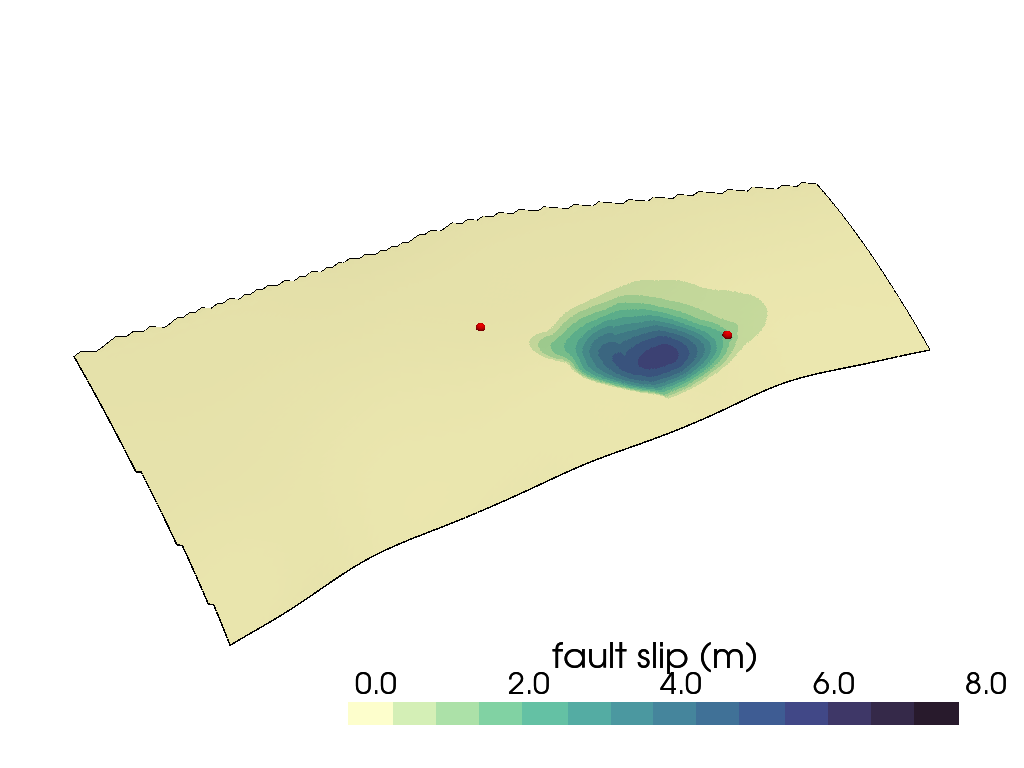

In [45]:
TrialFaultMesh["fault slip (m)"] = asl[0]
cscale = [0,8.0]


pl = pv.Plotter()
# pl.add_mesh(TrialFaultMesh)
pl.add_mesh(TrialFaultMesh,scalars="fault slip (m)", clim=cscale, cmap = Cmap2,show_scalar_bar=False)
pl.add_scalar_bar(
    'fault slip (m)',
    interactive=True,
    vertical=False,
    title_font_size=35,
    label_font_size=30,
    fmt='%10.1f',
)
pl.add_mesh(fault_edges,color='black',line_width=1.5)

pl.add_points(PointCloud,color='red',render_points_as_spheres=True,point_size=10.0)

pl.camera.view_angle = 20
pl.camera.azimuth = 45.0
pl.show(screenshot='fig-asl-' + modelname +'.png',jupyter_backend="static")

In [17]:
print(edges)
fault_edges.save('fault_edge_alaska.vtk')

PolyData (0x16448c700)
  N Cells:    1930
  N Points:   1930
  N Strips:   0
  X Bounds:   1.293e+06, 1.872e+06
  Y Bounds:   -2.098e+06, -1.628e+06
  Z Bounds:   -4.500e+04, -6.563e+03
  N Arrays:   2


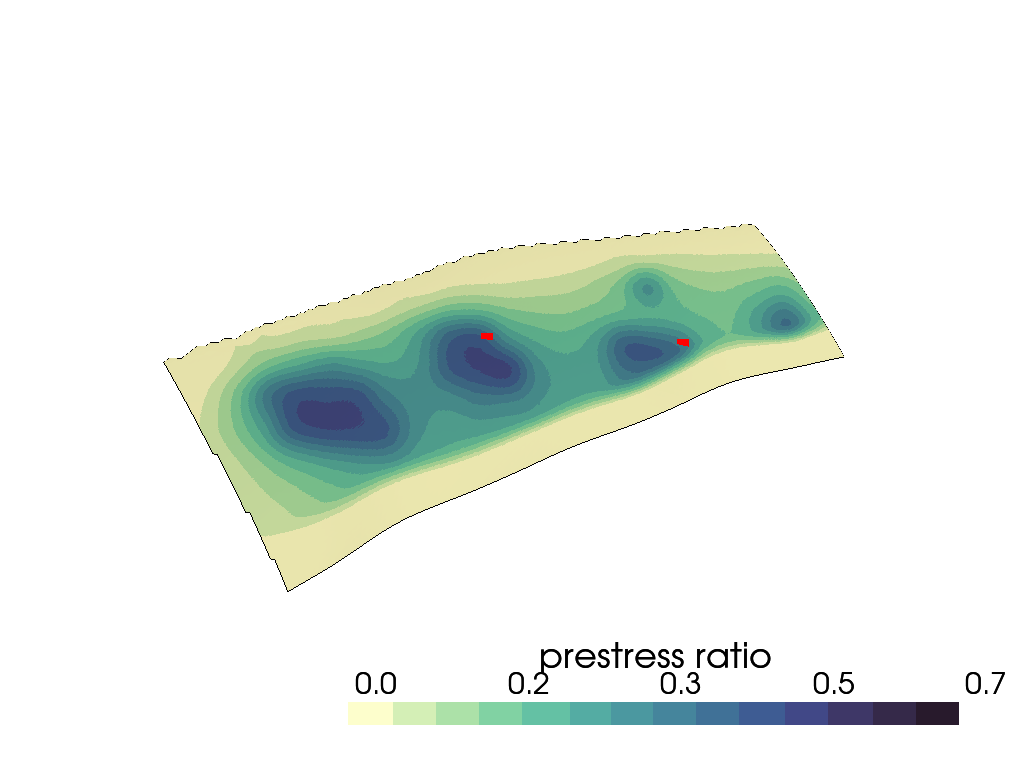

In [20]:
TrialFaultMesh["T"] = tmp[0] - 483
TrialFaultMesh["R0"] = r0
TrialFaultMesh["Effective normal stress (MPa)"] = pn0[0]/1e6


pl = pv.Plotter(shape=(1, 1))

cscale = [0,.70]

pl.add_mesh(TrialFaultMesh,scalars="R0", clim=cscale, cmap = Cmap2,show_scalar_bar=False)
pl.add_scalar_bar(
    'prestress ratio',
    interactive=True,
    vertical=False,
    title_font_size=35,
    label_font_size=30,
    fmt='%10.1f',
)
pl.add_mesh(fault_edges,color='black')
pl.add_points(PointCloud,color='red',render_points_as_spheres=True,point_size=12)


pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

pl.show(screenshot='fig-r0-' + modelname + '.png',jupyter_backend="static")

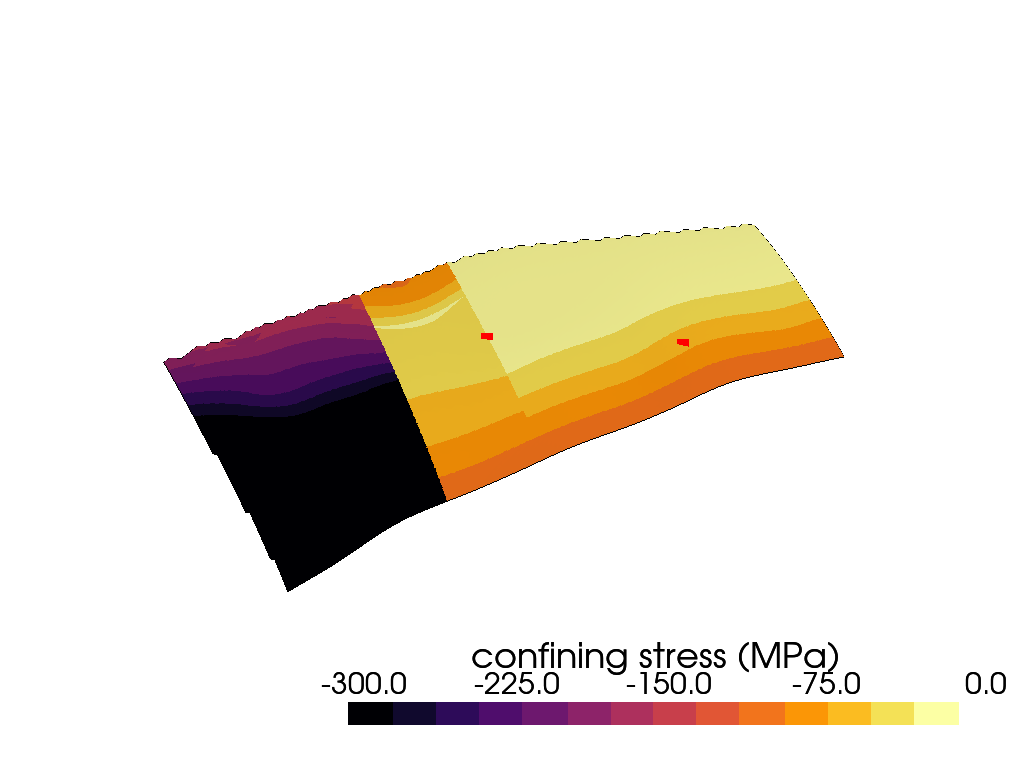

In [23]:
## plot confiniing stress on the fault

pl = pv.Plotter(shape=(1, 1))
cscale = [-300,0]

pl.add_mesh(TrialFaultMesh.copy(),scalars="Effective normal stress (MPa)", clim=cscale, cmap = Cmap,show_scalar_bar=False)
pl.add_scalar_bar(
    'confining stress (MPa)',
    interactive=True,
    vertical=False,
    title_font_size=35,
    label_font_size=30,
    fmt='%10.1f',
)
pl.add_mesh(fault_edges,color='black')

pl.add_points(PointCloud,render_points_as_spheres=True,color='red',point_size=12.0)

pl.camera.view_angle = 25
pl.camera.azimuth = 45.0


# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])

pl.show(screenshot='fig-pn0-' + modelname + '.png',jupyter_backend="static")

In [48]:
#%%
slp0= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=1,oneDtMem=True,firstElement=-1)
slp1 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=2,oneDtMem=True,firstElement=-1)
slp2= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=3,oneDtMem=True,firstElement=-1)
slp3 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=4,oneDtMem=True,firstElement=-1)
slp4= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=5,oneDtMem=True,firstElement=-1)
slp5 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=6,oneDtMem=True,firstElement=-1)
slp6= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=7,oneDtMem=True,firstElement=-1)
slp7 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=8,oneDtMem=True,firstElement=-1)
slp8 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=9,oneDtMem=True,firstElement=-1)
slp9 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=10,oneDtMem=True,firstElement=-1)
slp10 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=11,oneDtMem=True,firstElement=-1)


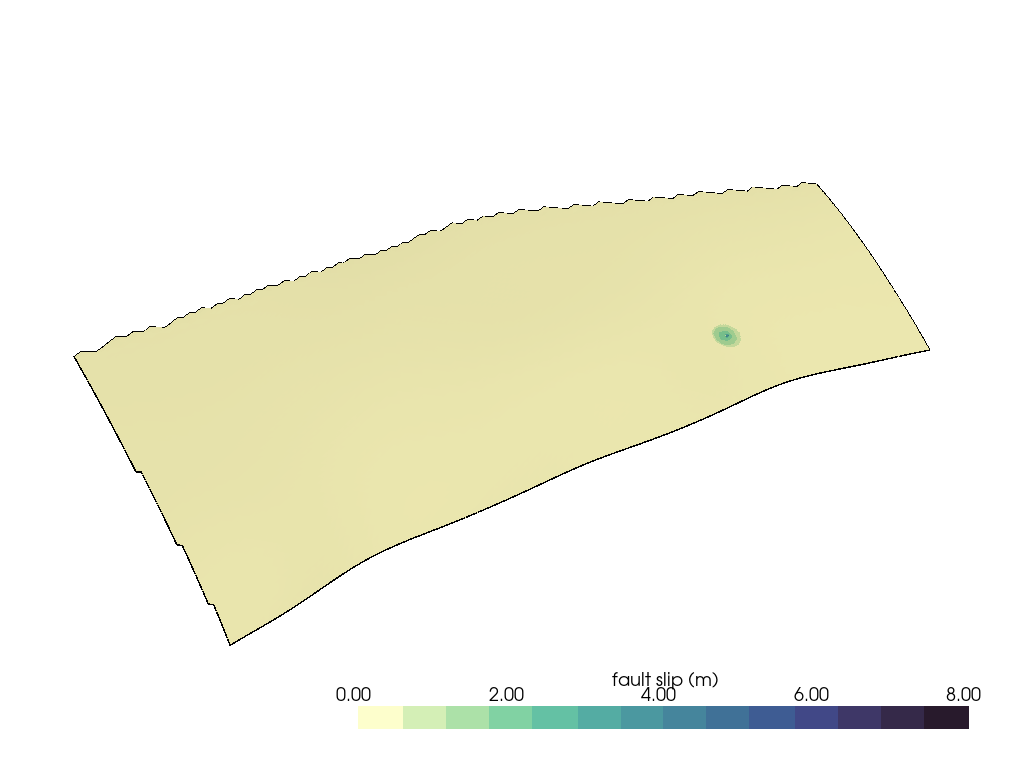

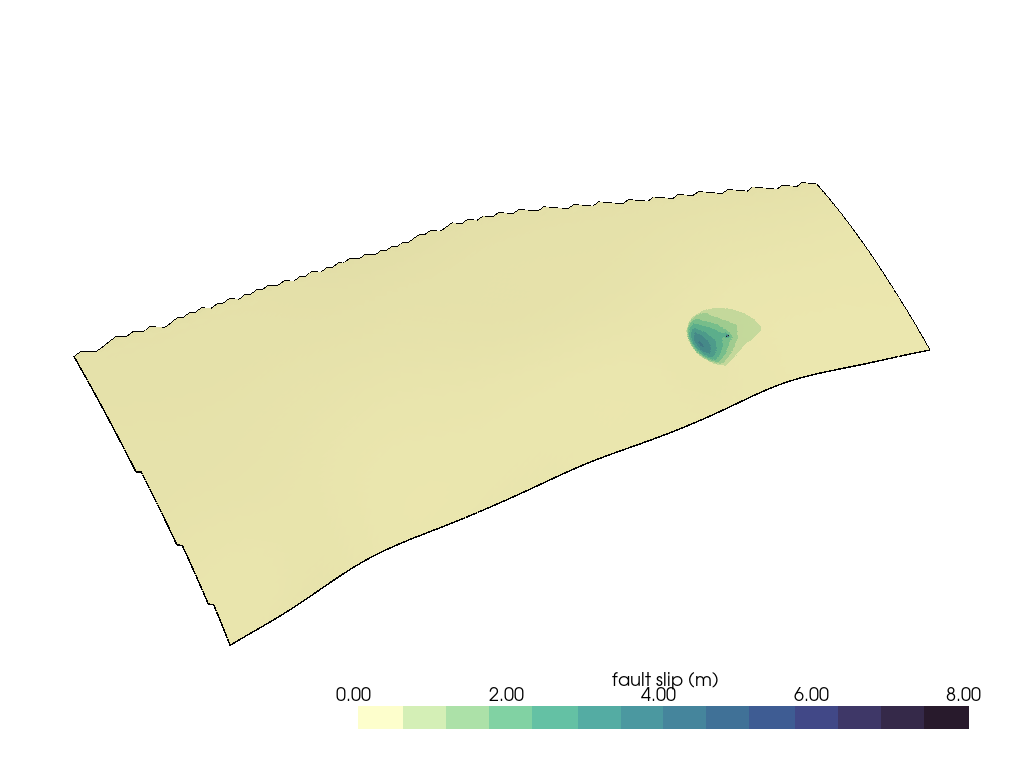

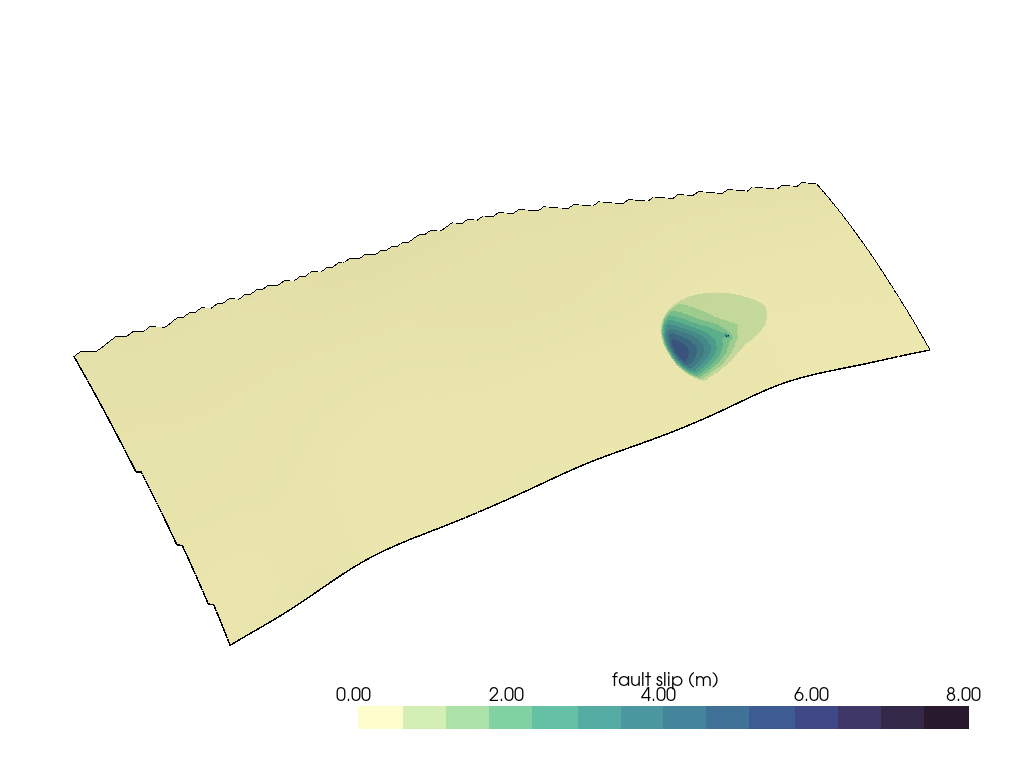

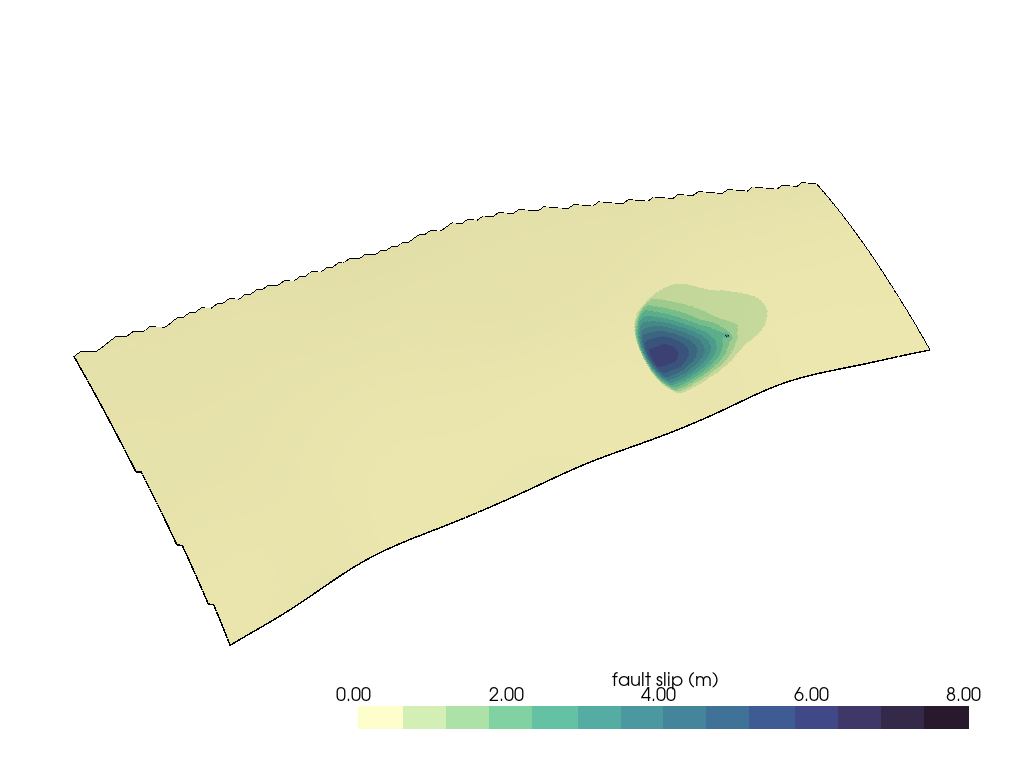

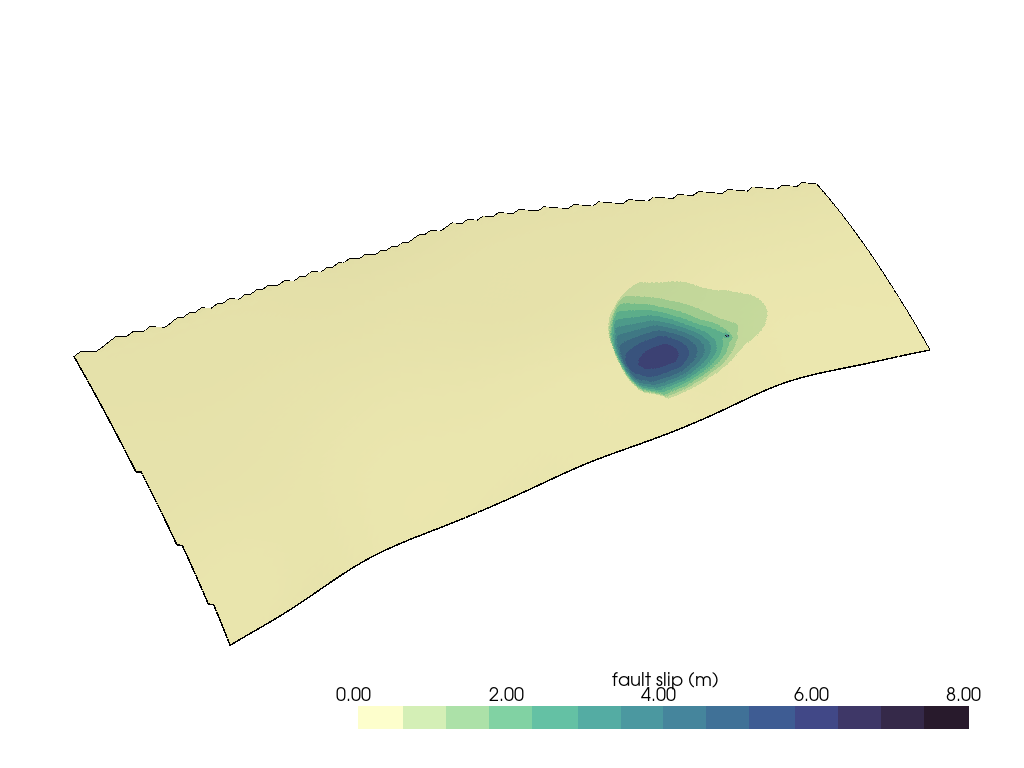

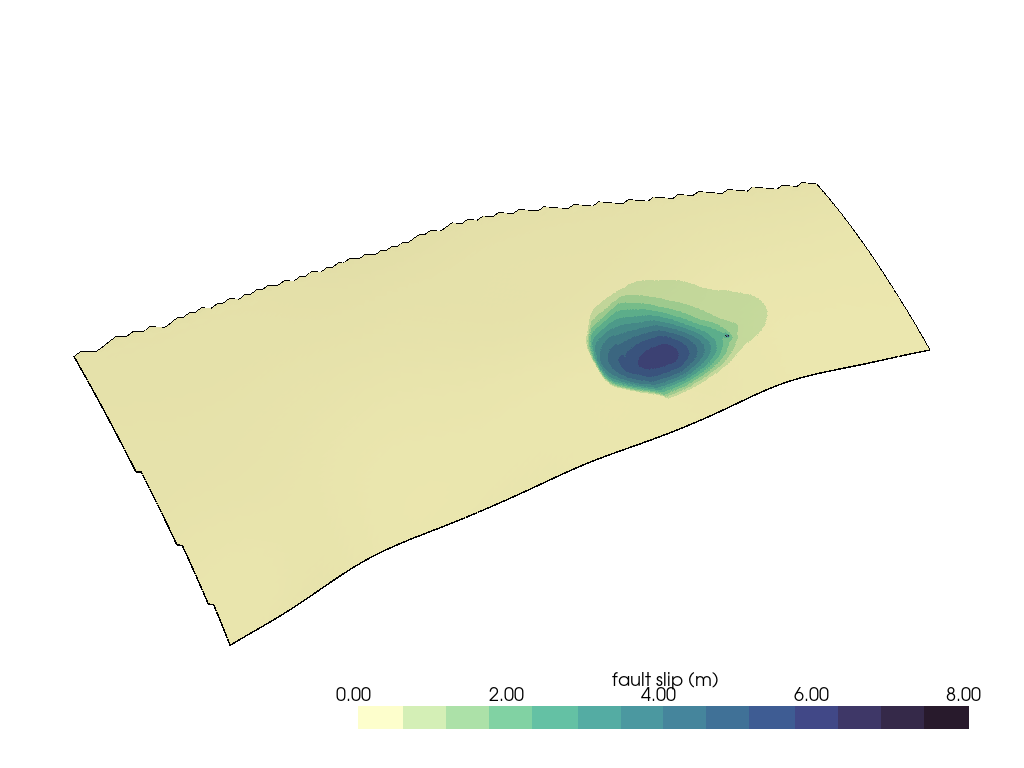

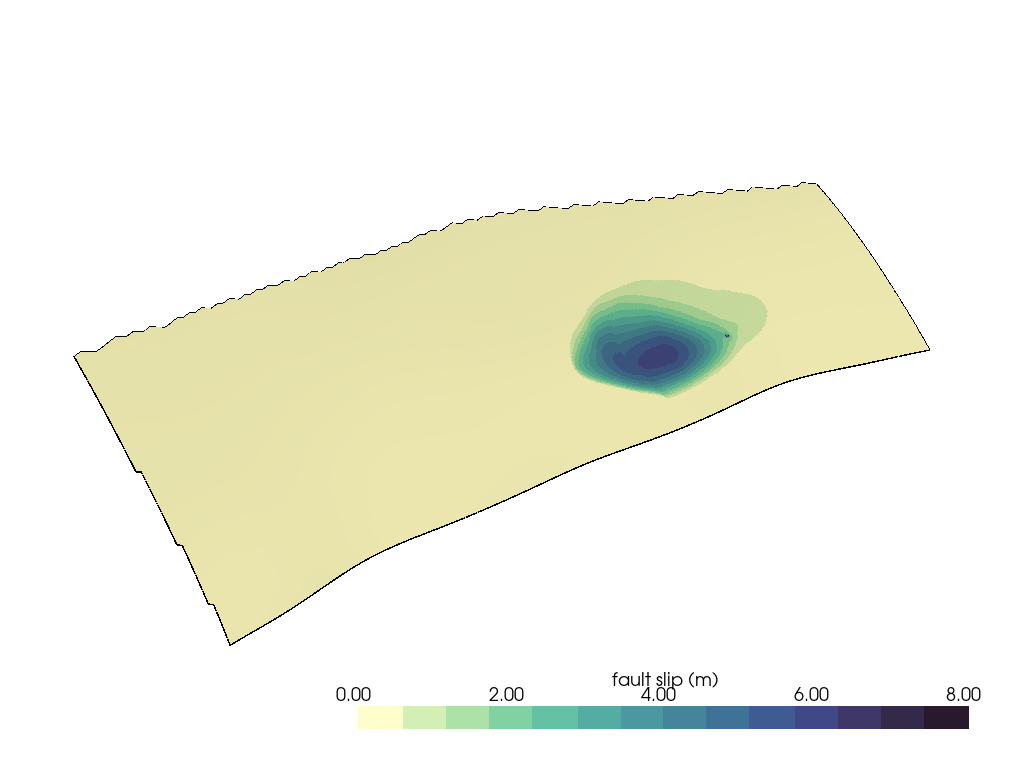

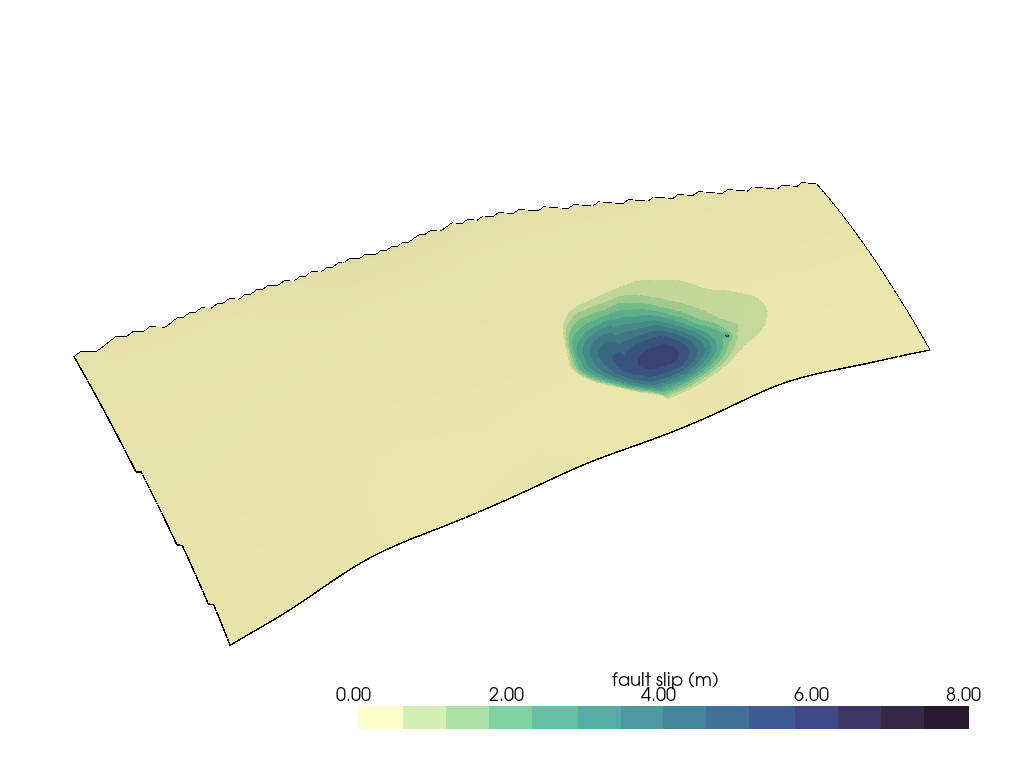

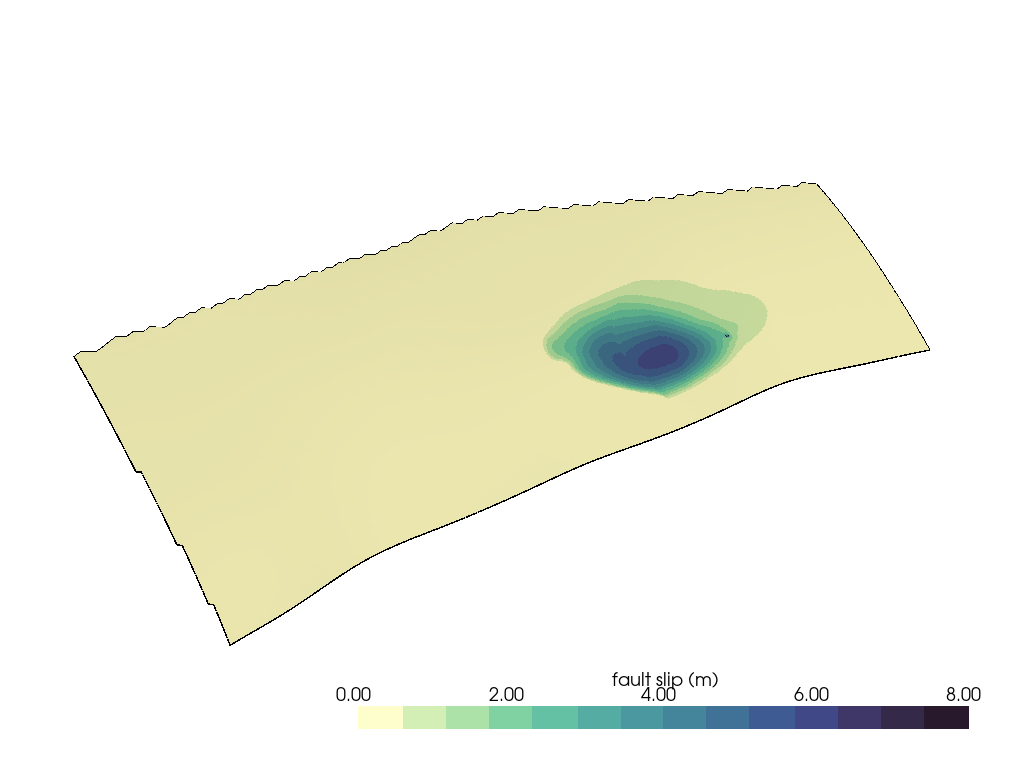

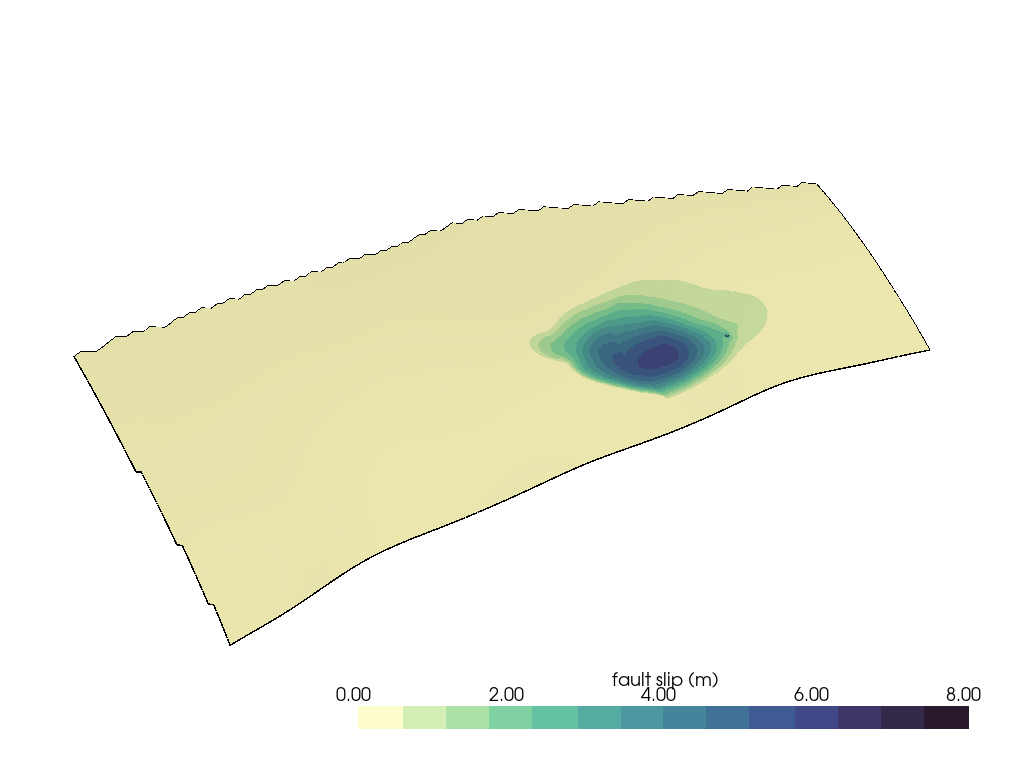

In [52]:

for i in range(0,10):
        
    exec(f"TrialFaultMesh['fault slip (m)'] =  slp{i}[0]")
    cscale = [0,8.0]


    pl = pv.Plotter()
    # pl.add_mesh(TrialFaultMesh)
    pl.add_mesh(TrialFaultMesh,scalars="fault slip (m)", clim=cscale, cmap = Cmap2 ,show_scalar_bar=False)
    pl.add_scalar_bar(
    'fault slip (m)',
    interactive=True,
    vertical=False,
    title_font_size=35,
    label_font_size=30,
    fmt='%10.1f',
    )
    pl.add_mesh(fault_edges,color='black',line_width=1.5)

    pl.camera.view_angle = 20
    pl.camera.azimuth = 45.0
    pl.show(screenshot='fig-slp-'+ modelname + '-' + str(i) +'.png',jupyter_backend="static")

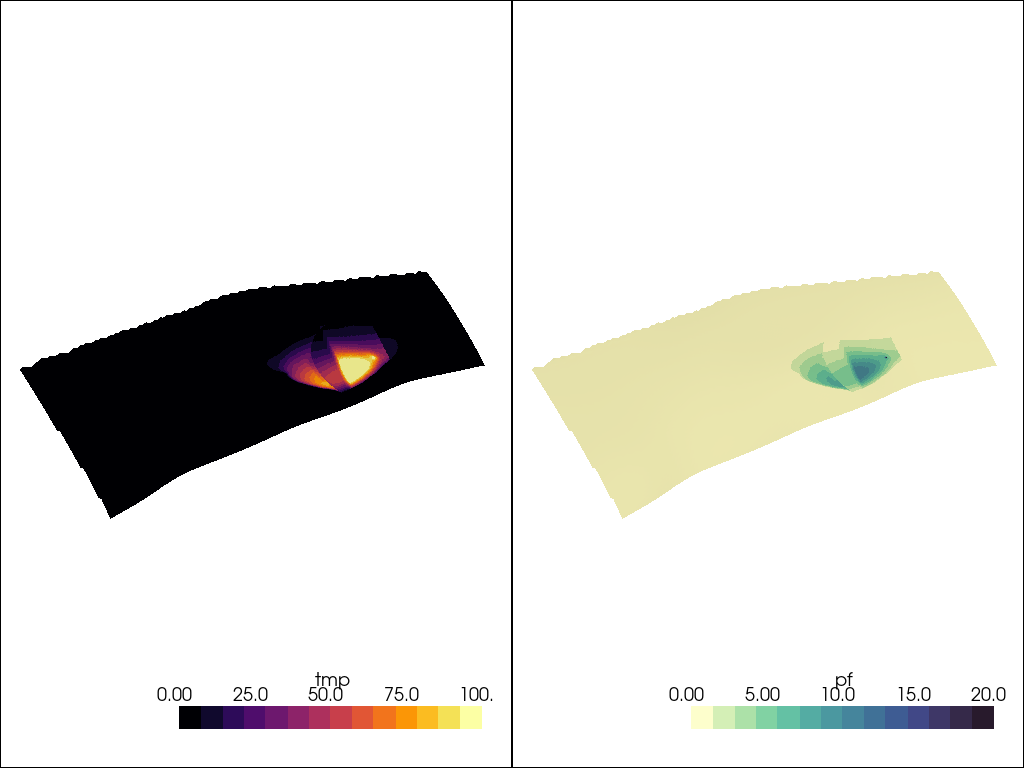

In [47]:
TrialFaultMesh["tmp"] = tmp[0] - 483
TrialFaultMesh["pf"] = -pf[0]/1e6


pl = pv.Plotter(shape=(1, 2))

cscale = [0,100]

pl.add_mesh(TrialFaultMesh,scalars="tmp", clim=cscale, cmap = Cmap)
pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

cscale = [0,20]

pl.subplot(0, 1)
pl.add_mesh(TrialFaultMesh.copy(),scalars="pf", clim=cscale, cmap = Cmap2)
pl.camera.view_angle = 25
pl.camera.azimuth = 45.0


# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])

pl.show(screenshot='fig-tmp-pf-' + modelname + '.png',jupyter_backend="static")

In [58]:
# plot residual shear stress
pn0 = LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
td0 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
td1 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)

risd_ratio = -td1[0]/pn0[0]

stressd = (td0[0]-td1[0])/1e6

In [18]:
## plot parameters d_c

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

r = np.sqrt(np.power(centers[:,0]-1433876.0,2.0)+np.power(centers[:,1]+1927693.0,2.0)+np.power(centers[:,2]+30786.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a = (r-r_crit0)/r_crit

# r2 = np.sqrt(np.power(centers[:,0]-1.5419e6,2.0)+np.power(centers[:,1]+1.87e6,2.0)+np.power(centers[:,2]+18000.0,2.0));
r2 = np.sqrt(np.power(centers[:,0]-1.603439e6,2.0)+np.power(centers[:,1]+1.91448e6,2.0)+np.power(centers[:,2]+15679.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a2 = (r2-r_crit0)/r_crit


r3 = np.sqrt(np.power(centers[:,0]-1.678439e6,2.0)+np.power(centers[:,1]+1.86448e6,2.0)+np.power(centers[:,2]+15679.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a3 = (r2-r_crit0)/r_crit

alpha1 = np.where(a<1.0,a,1.0)
alpha = np.where(alpha1>0.0,alpha1,0.0)

beta1 = np.where(r0>0.3,r0, 0.1 )
beta2 = 0.8-beta1

rs_l0 = 0.2-0.1*alpha
wf = rs_l0-rs_l0+1e-5

dd = np.where(r>90000.0)
dd2 = np.where(r2<55000.0)
dd3 = np.where(r3<55000.0)

dd4 = np.where(r< 100000.0)


rs_l0[dd] = 0.8 
rs_l0[dd2] = 0.1 
rs_l0[dd3] = 0.1 

wf[dd] = 1e-8
wf[dd2] = 1e-5
wf[dd3] = 1e-5

# beta2[dd4]= 0.1



NameError: name 'r0' is not defined

In [19]:
## plot parameters d_c segments and TP parameters segment

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

ac = 2.85
bc = 1
cc = -2.05e6
yx = ac * centers[:,0]+ bc*centers[:,1] + cc

alpha = np.zeros(yx.shape)+1e-5
wf_l0 = np.zeros(yx.shape)+0.035


dd = np.where(yx<0.05e6)
alpha[dd] = 1e-8
wf_l0[dd]=0.1

dd = np.where(yx>0.25e6)
alpha[dd] = 1e-8
wf_l0[dd] = 0.1


In [25]:
## plot parameter TP parameters segment

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

ac = 2.85
bc = 1
cc = -2.05e6
yx = ac * centers[:,0]+ bc*centers[:,1] + cc

rs_l0 = np.zeros(yx.shape)+1e-8
wf = np.zeros(yx.shape)+0.1


dd = np.where(centers[:,2]>-14.0e3)
rs_l0[dd] = 1e-5
wf[dd] = 0.024

dd = np.where(yx<0.25e6)
rs_l0[dd] = 1e-5
wf[dd] = 0.035

dd = np.where(yx>0.85e6)
rs_l0[dd] = 1e-8
wf[dd] = 0.1

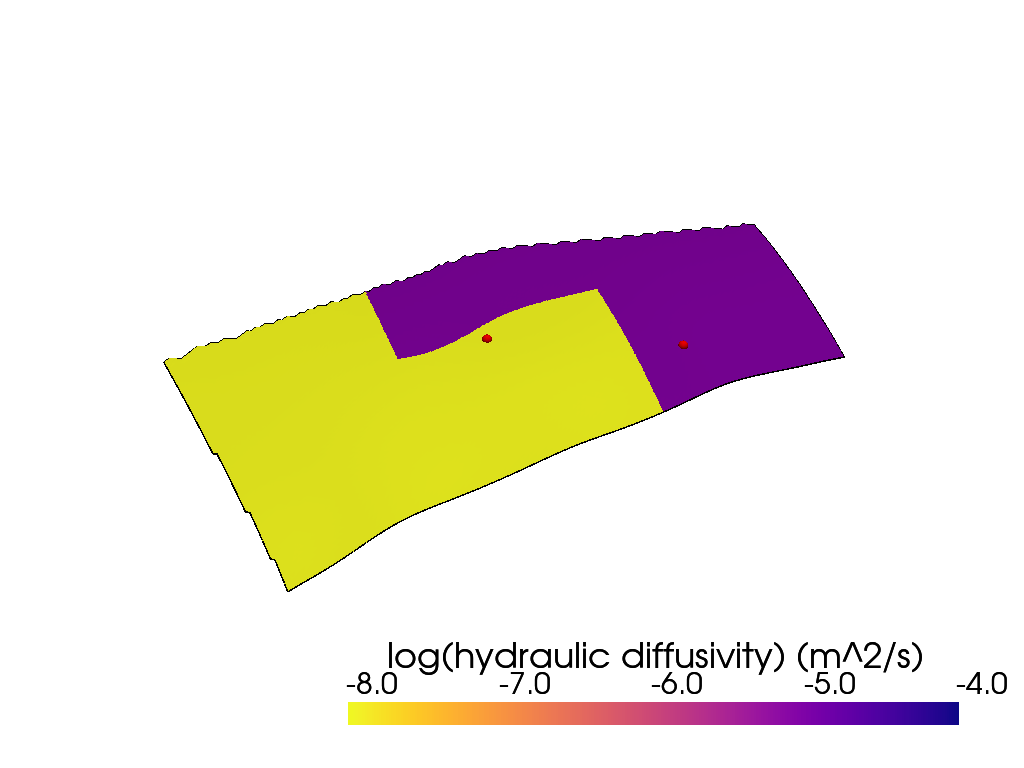

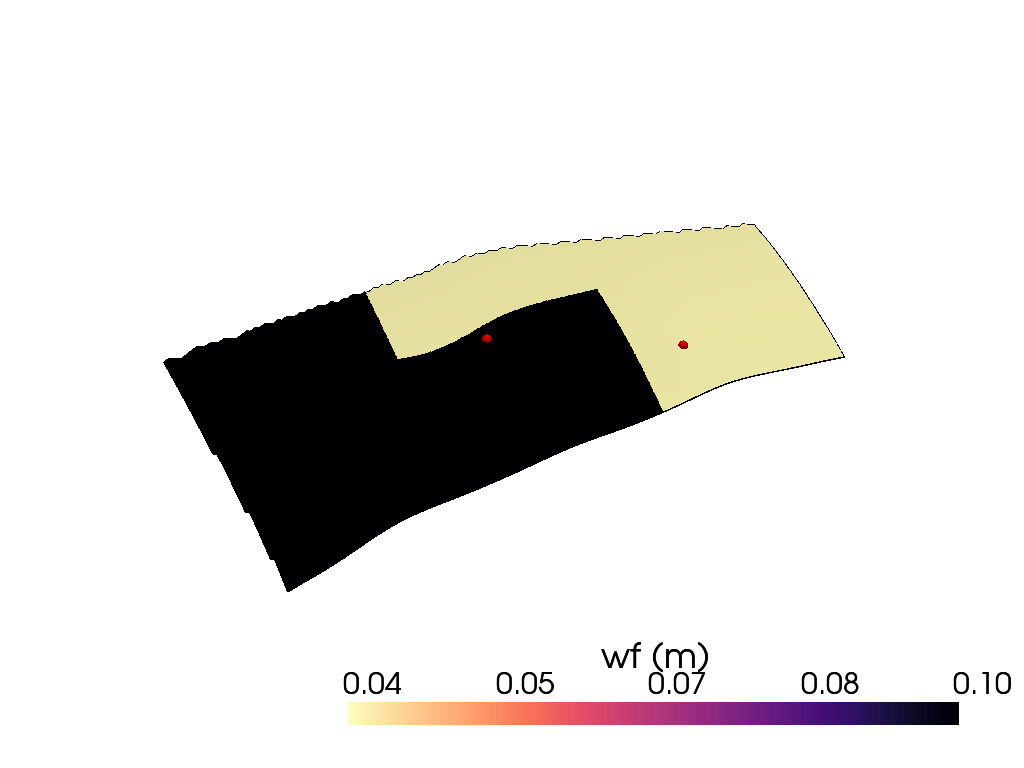

In [43]:
TrialFaultMesh["hydraulic diffusivity"] = np.log10(rs_l0)
TrialFaultMesh["half width of fault zone"] = wf


pl = pv.Plotter(shape=(1, 1))

cscale = [-8,-4]

pl.add_mesh(TrialFaultMesh,scalars="hydraulic diffusivity",clim=cscale, cmap = 'plasma_r',show_scalar_bar=False)
pl.add_scalar_bar(
    # r"$$\alpha_{hy}$$",
    'log(hydraulic diffusivity) (m^2/s)',
    interactive=True,
    vertical=False,
    title_font_size=35,
    label_font_size=30,
    fmt='%10.1f',
)
pl.add_mesh(fault_edges,color='black',line_width=1.5)
pl.add_points(PointCloud,color='red',render_points_as_spheres=True,point_size=10)
pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

pl.show(screenshot='fig-alpha-' + modelname + '.png',jupyter_backend="static")


## plot fault zone half-width
cscale = [0.035,0.1]

pl = pv.Plotter(shape=(1, 1))

pl.add_mesh(TrialFaultMesh.copy(),scalars="half width of fault zone", clim=cscale , cmap = 'magma_r',show_scalar_bar=False)
pl.add_scalar_bar(
    'wf (m)',
    interactive=True,
    vertical=False,
    title_font_size=35,
    label_font_size=30,
    fmt='%10.2f',
)
pl.add_mesh(fault_edges,color='black',line_width=1.5)
pl.add_points(PointCloud,color='red',render_points_as_spheres=True,point_size=10)
pl.camera.view_angle = 25
pl.camera.azimuth = 45.0
pl.show(screenshot='fig-wf-' + modelname + '.png',jupyter_backend="static")

# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])



In [34]:
# plot structure surface topography
pv.Report()

--------------------------------------------------------------------------------
  Date: Wed Dec 13 23:10:20 2023 NZDT

                OS : Darwin
            CPU(s) : 8
           Machine : x86_64
      Architecture : 64bit
               RAM : 16.0 GiB
       Environment : Jupyter
       File system : apfs
        GPU Vendor : Intel Inc.
      GPU Renderer : Intel(R) Iris(TM) Plus Graphics 655
       GPU Version : 4.1 INTEL-18.5.6
  MathText Support : False

  Python 3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:52:10)
  [Clang 15.0.7 ]

           pyvista : 0.42.3
               vtk : 9.3.0
             numpy : 1.26.0
        matplotlib : 3.8.1
            scooby : 0.9.2
             pooch : 1.8.0
            pillow : 10.0.1
           IPython : 8.17.2
        ipywidgets : 8.1.1
             scipy : 1.11.3
            meshio : 5.3.4
        jupyterlab : 4.0.7
      nest_asyncio : 1.5.8
--------------------------------------------------------------------------------

In [40]:
import vtk
vtk_mathtext = vtk.vtkMathTextFreeTypeTextRenderer()
vtk_mathtext.MathTextIsSupported()

True

In [ ]:
# plot volumetric output
modelname = 'rup22h'
foldername = '/Volumes/heiterwange/seissol/alaska/rupture1938/'
# print(slip_usgs.shape
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj( init='EPSG:5936',ellps='WGS84', datum='WGS84')

xdmfFilename = foldername + modelname + '.xdmf'  # volumetric output
ndt = ReadNdt(xdmfFilename)

sxVol_xyz = ReadGeometry(xdmfFilename)
sxVol_connect = ReadConnect(xdmfFilename)
 
sxVol_ndt = ndt -1
sxVol_eta = LoadData(xdmfFilename,'eta',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)


if (not os.path.exists(vtkFile)):
    FaultMesh = meshio.write_points_cells(vtkFile, sxVol_xyz, [("tetra",sxVol_connect)])
    del FaultMesh

# import the vtk file into pyvista
mesh = pv.read(vtkFile)
print(mesh.bounds)

